In [ ]:
import duckdb
from pathlib import Path

In [ ]:
conn = duckdb.connect()

with open("load_sakila.sql", "r") as f:
    conn.execute(f.read())

conn.sql("SELECT * FROM film LIMIT 5").df()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


### Movies longer than 3 hours

In [4]:
q_a = conn.sql("""
    SELECT title, length
    FROM film
    WHERE length > 180
    ORDER BY length DESC;
""").df()

q_a.head()

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185


### Movies with the word "love" in its title

In [5]:
q_b = conn.sql("""
    SELECT
        title,
        rating,
        length,
        description
    FROM film
    WHERE LOWER(title) LIKE '%love%'
    ORDER BY title;
""").df()

q_b

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


### descriptive statistics

In [6]:
q_c = conn.sql("""
    SELECT
        MIN(length)    AS shortest,
        AVG(length)    AS average,
        MEDIAN(length) AS median,
        MAX(length)    AS longest
    FROM film;
""").df()

q_c

,shortest,average,median,longest
0,46,115.272,114.0,185


### Rental rate

In [7]:
q_d = conn.sql("""
    SELECT
        title,
        rental_rate,
        rental_duration,
        rental_rate / rental_duration AS rate_per_day
    FROM film
    ORDER BY rate_per_day DESC
    LIMIT 10;
""").df()

q_d

,title,rental_rate,rental_duration,rate_per_day
0,AMERICAN CIRCUS,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,CARIBBEAN LIBERTY,4.99,3,1.663333
5,AUTUMN CROW,4.99,3,1.663333
6,CASPER DRAGONFLY,4.99,3,1.663333
7,ACE GOLDFINGER,4.99,3,1.663333
8,BEHAVIOR RUNAWAY,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


### Actors have played in the most movies

In [8]:
q_e = conn.sql("""
    SELECT
        a.actor_id,
        a.first_name,
        a.last_name,
        COUNT(*) AS num_movies
    FROM actor a
    JOIN film_actor fa
        ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, a.first_name, a.last_name
    ORDER BY num_movies DESC
    LIMIT 10;
""").df()

q_e

,actor_id,first_name,last_name,num_movies
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
5,81.0,SCARLETT,DAMON,36
6,106.0,GROUCHO,DUNST,35
7,144.0,ANGELA,WITHERSPOON,35
8,60.0,HENRY,BERRY,35
9,37.0,VAL,BOLGER,35


### Any actor named Leo

In [9]:
q_f = conn.sql("""
    SELECT
        actor_id,
        first_name,
        last_name
        description
    FROM actor
    WHERE LOWER(first_name) = 'leo'
    ORDER BY last_name;
""").df()

q_f

,actor_id,first_name,description


### Most common first name

In [10]:
q_g = conn.sql("""
    SELECT
        first_name,
        COUNT(*) AS count
    FROM actor
    GROUP BY first_name
    ORDER BY count DESC
    LIMIT 10;
""").df()

q_g
        

,first_name,count
0,JULIA,4
1,KENNETH,4
2,PENELOPE,4
3,CUBA,3
4,JAYNE,3
5,CHRISTIAN,3
6,CAMERON,3
7,MATTHEW,3
8,MORGAN,3
9,FAY,3


### Which film category has the highest average movie length?

In [11]:
df = conn.sql("""
    SELECT 
        c.name AS category,
        f.length
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON f.film_id = fc.film_id
""").df()

df.head(10)

,category,length
0,Documentary,86
1,Horror,48
2,Documentary,50
3,Horror,117
4,Family,130
5,Foreign,169
6,Comedy,62
7,Horror,54
8,Horror,114
9,Sports,63


### Film category with the highest average length

In [12]:
df = conn.sql("""
    SELECT 
        c.name AS category,
        f.length
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON f.film_id = fc.film_id
""").df()

avg_length_by_category = df.groupby("category")["length"].mean()

avg_length_by_category = avg_length_by_category.sort_values(ascending=False)

avg_length_by_category

category
Sports         128.202703
Games          127.836066
Foreign        121.698630
Drama          120.838710
Comedy         115.827586
Family         114.782609
Music          113.647059
Travel         113.315789
Horror         112.482143
Classics       111.666667
Action         111.609375
New            111.126984
Animation      111.015152
Children       109.800000
Documentary    108.750000
Sci-Fi         108.196721
Name: length, dtype: float64

In [14]:
import matplotlib.pyplot as plt

### Top 5 customers by total spend

In [19]:
df_top_customers = conn.sql("""
    SELECT
        c.customer_id,
        c.first_name,
        c.last_name,
        SUM(p.amount) AS total_spend
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY c.customer_id, c.first_name, c.last_name
    ORDER BY total_spend DESC
    LIMIT 5;
""").df()

df_top_customers

,customer_id,first_name,last_name,total_spend
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,137,RHONDA,KENNEDY,194.61
4,178,MARION,SNYDER,194.61


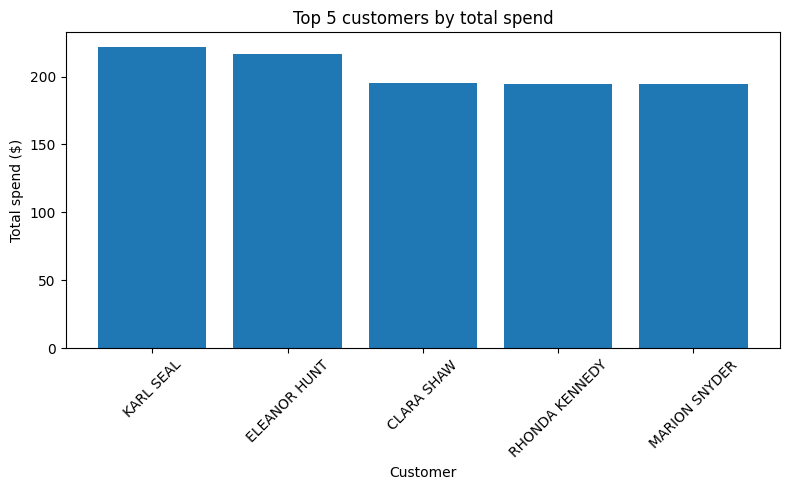

In [21]:
customer_names = df_top_customers["first_name"] + " " + df_top_customers["last_name"]

plt.figure(figsize=(8, 5))
plt.bar(customer_names, df_top_customers["total_spend"])
plt.xlabel("Customer")
plt.ylabel("Total spend ($)")
plt.title("Top 5 customers by total spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total revenue per film category

In [22]:
df_category_revenue = conn.sql("""
    SELECT 
        c.name AS category,
        SUM(p.amount) AS revenue
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY c.name
    ORDER BY revenue DESC;
""").df()

df_category_revenue

,category,revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


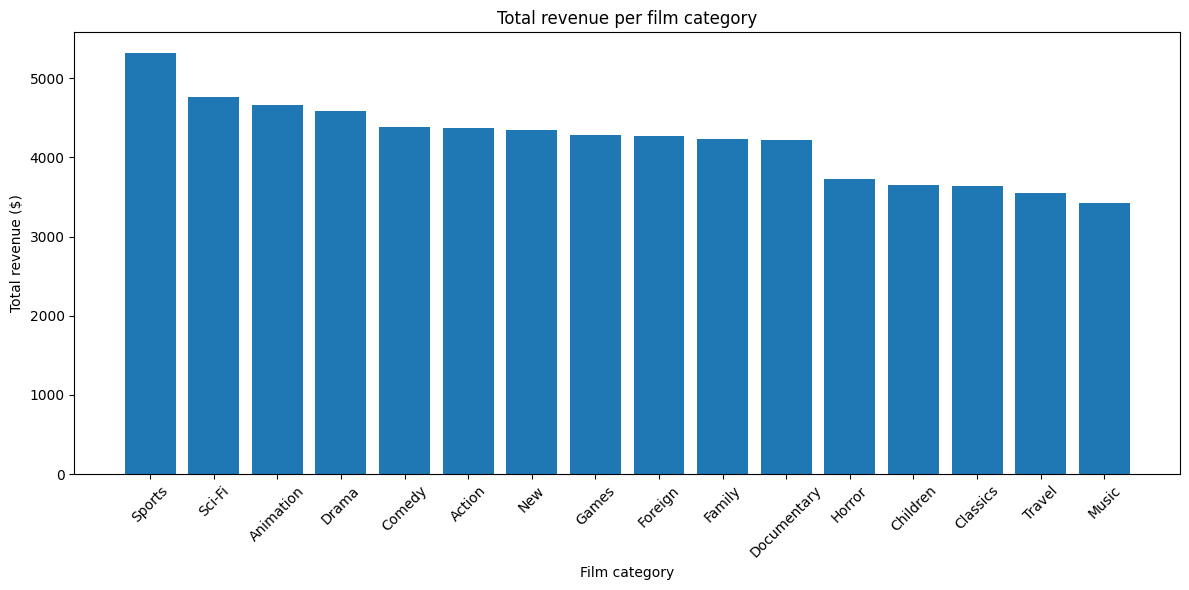

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(df_category_revenue["category"], df_category_revenue["revenue"])
plt.xlabel("Film category")
plt.ylabel("Total revenue ($)")
plt.title("Total revenue per film category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()